#importing libraries

In [1]:
pip install  seaborn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib. pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv('deaths.csv')
df

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million
0,AFG,Asia,Afghanistan,1/3/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,1/4/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332518,ZWE,Africa,Zimbabwe,8/5/2023,16320539,265693.0,0.0,0.0,5712.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332519,ZWE,Africa,Zimbabwe,8/6/2023,16320539,265693.0,0.0,0.0,5712.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332520,ZWE,Africa,Zimbabwe,8/7/2023,16320539,265693.0,0.0,0.0,5712.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332521,ZWE,Africa,Zimbabwe,8/8/2023,16320539,265693.0,0.0,0.0,5712.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#DATA CLEANING
## dropping unuseful columns

In [3]:

df.drop(columns=['new_cases_smoothed','new_deaths_smoothed_per_million','reproduction_rate','icu_patients','icu_patients_per_million','hosp_patients','hosp_patients_per_million','weekly_icu_admissions','weekly_icu_admissions_per_million',
                'weekly_hosp_admissions','weekly_hosp_admissions_per_million'],inplace=True)
df.drop(columns=['new_cases_per_million','new_cases_smoothed_per_million','total_deaths_per_million','new_deaths_per_million','total_cases_per_million','new_deaths_smoothed'],inplace=True)
df

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths
0,AFG,Asia,Afghanistan,1/3/2020,41128772,NaN,0.0,NaN,0.0
1,AFG,Asia,Afghanistan,1/4/2020,41128772,NaN,0.0,NaN,0.0
2,AFG,Asia,Afghanistan,1/5/2020,41128772,NaN,0.0,NaN,0.0
3,AFG,Asia,Afghanistan,1/6/2020,41128772,NaN,0.0,NaN,0.0
4,AFG,Asia,Afghanistan,1/7/2020,41128772,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...
332518,ZWE,Africa,Zimbabwe,8/5/2023,16320539,265693.0,0.0,5712.0,0.0
332519,ZWE,Africa,Zimbabwe,8/6/2023,16320539,265693.0,0.0,5712.0,0.0
332520,ZWE,Africa,Zimbabwe,8/7/2023,16320539,265693.0,0.0,5712.0,0.0
332521,ZWE,Africa,Zimbabwe,8/8/2023,16320539,265693.0,0.0,5712.0,0.0


In [10]:
df.shape

(332523, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332523 entries, 0 to 332522
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   iso_code      332523 non-null  object        
 1   continent     316712 non-null  object        
 2   location      332523 non-null  object        
 3   date          332523 non-null  datetime64[ns]
 4   population    332523 non-null  int64         
 5   total_cases   295008 non-null  float64       
 6   new_cases     323383 non-null  float64       
 7   total_deaths  273840 non-null  float64       
 8   new_deaths    323443 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 22.8+ MB


## cleaning data

#changin data types

change date column data type into datetime

In [4]:
import datetime as dt

In [6]:
df['date']=pd.to_datetime(df['date'])
df['months']=df['date'].dt.month_name()

splitting date column into years it containg 4 years i willmake it every years own data

2020 data

In [7]:
desired_year=2020
data_2020=df[df['date'].dt.year==desired_year]
data_2020

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,months
0,AFG,Asia,Afghanistan,2020-01-03,41128772,NaN,0.0,NaN,0.0,January
1,AFG,Asia,Afghanistan,2020-01-04,41128772,NaN,0.0,NaN,0.0,January
2,AFG,Asia,Afghanistan,2020-01-05,41128772,NaN,0.0,NaN,0.0,January
3,AFG,Asia,Afghanistan,2020-01-06,41128772,NaN,0.0,NaN,0.0,January
4,AFG,Asia,Afghanistan,2020-01-07,41128772,NaN,0.0,NaN,0.0,January
...,...,...,...,...,...,...,...,...,...,...
331567,ZWE,Africa,Zimbabwe,2020-12-27,16320539,12963.0,83.0,341.0,0.0,December
331568,ZWE,Africa,Zimbabwe,2020-12-28,16320539,13077.0,114.0,349.0,8.0,December
331569,ZWE,Africa,Zimbabwe,2020-12-29,16320539,13148.0,71.0,354.0,5.0,December
331570,ZWE,Africa,Zimbabwe,2020-12-30,16320539,13325.0,177.0,359.0,5.0,December


## Analayzing only 2020 data

### splittng date column to add month and day columns 

In [10]:
data_2020['month']=data_2020['date'].dt.month
data_2020['day']=data_2020['date'].dt.day


C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_28468\3552319862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['month']=data_2020['date'].dt.month
C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_28468\3552319862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020['day']=data_2020['date'].dt.day


largest population countries in 2020

In [11]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('location')['population'].max().reset_index().sort_values(by='population',ascending=False)
grouped_df

,location,population
42,China,1425887360
96,India,1417173120
227,United States,338289856
97,Indonesia,275501344
160,Pakistan,235824864
...,...,...
69,Falkland Islands,3801
153,Niue,1952
215,Tokelau,1893
232,Vatican,808


In [24]:
population_2020=px.bar(grouped_df,x='location',y='population',color='location',height=500,text='population')



## most country affected covid19 in 2020

In [37]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('location')['total_cases'].max().reset_index().sort_values(by='total_cases',ascending=False)
grouped_df

,location,total_cases
227,United States,19577585.0
96,India,10266674.0
28,Brazil,7563551.0
175,Russia,3159297.0
226,United Kingdom,2563561.0
...,...,...
215,Tokelau,NaN
216,Tonga,NaN
220,Turkmenistan,NaN
222,Tuvalu,NaN


we see that usa is the most country who got effected covid19 around 19million people found covid 19

EXPLORATORY DATA ANALYSIS ON MOST COUNTRY EFFECTED BY COVID19 IN 2020

In [45]:
fig=px.line(grouped_df,x='location',y='total_cases',height=600)

fig
#loc=data_2020['location'].unique()

countries who got most of new cases of covid19 in 2020

In [ ]:
px.

In [32]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('location')['new_cases'].max().reset_index().sort_values(by='new_cases',ascending=False)
grouped_df

,location,new_cases
72,France,332505.0
227,United States,246505.0
78,Germany,174589.0
202,Spain,144877.0
96,India,97894.0
...,...,...
93,Hong Kong,NaN
156,Northern Ireland,NaN
188,Scotland,NaN
209,Taiwan,NaN


In [33]:
fig = px.bar(grouped_df, x='location', y='new_cases', color='location',title='Max New Cases by Location',text='new_cases',height=600)
fig.update_traces(textposition='outside')
labels=({'location': 'Location', 'new_cases': 'Max New Cases'})
fig

In [34]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('location')['new_deaths'].max().reset_index().sort_values(by='new_deaths',ascending=False)
grouped_df

,location,new_deaths
78,Germany,6460.0
202,Spain,5841.0
72,France,5602.0
59,Ecuador,3800.0
227,United States,3389.0
...,...,...
93,Hong Kong,NaN
156,Northern Ireland,NaN
188,Scotland,NaN
209,Taiwan,NaN


In [35]:
px.area(grouped_df,x='location',y='new_deaths',facet_col_wrap=25)

#continent and new_deaths

In [46]:
continent_deaths=data_2020.groupby('continent')['total_deaths'].sum().reset_index().sort_values(by='total_deaths',ascending=True)
continent_deaths

,continent,total_deaths
4,Oceania,160576.0
0,Africa,7367275.0
1,Asia,37989440.0
5,South America,57472140.0
2,Europe,66426459.0
3,North America,70671477.0


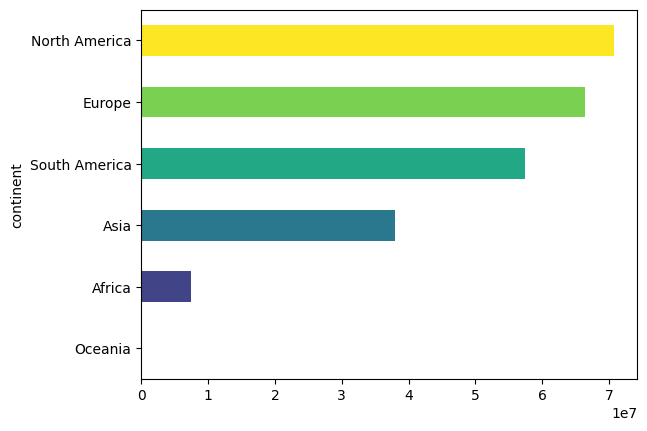

In [54]:

colors = plt.cm.viridis(np.linspace(0, 1, len(continent_deaths)))
ax = continent_deaths.plot(kind='barh', x='continent', y='total_deaths', color=colors, legend=False)
plt.show()


#months most people died 

In [55]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]
mont=filtered_df.groupby(['month','location'])['total_deaths'].sum().reset_index().sort_values(by='total_deaths',ascending=False)


In [56]:
fig=px.area(mont,x='month',y='total_deaths')

fig

what is the day that most people died in 2020?

In [61]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2020[~data_2020['location'].isin(exclude_values)]
mont=filtered_df.groupby(['day','location'])['total_deaths'].max().reset_index().sort_values(by='total_deaths',ascending=False)
mont

,day,location,total_deaths
7427,31,United States,352004.0
7187,30,United States,348653.0
6947,29,United States,346473.0
6707,28,United States,344570.0
6467,27,United States,342920.0
...,...,...,...
7430,31,Uzbekistan,NaN
7431,31,Vanuatu,NaN
7432,31,Vatican,NaN
7435,31,Wales,NaN


2021 data

In [7]:
desired_year=2021
data_2021=df[df['date'].dt.year==desired_year]
data_2021

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths
364,AFG,Asia,Afghanistan,2021-01-01,41128772,52513.0,183.0,2201.0,12.0
365,AFG,Asia,Afghanistan,2021-01-02,41128772,52586.0,73.0,2211.0,10.0
366,AFG,Asia,Afghanistan,2021-01-03,41128772,52709.0,123.0,2221.0,10.0
367,AFG,Asia,Afghanistan,2021-01-04,41128772,52909.0,200.0,2230.0,9.0
368,AFG,Asia,Afghanistan,2021-01-05,41128772,53011.0,102.0,2237.0,7.0
...,...,...,...,...,...,...,...,...,...
331932,ZWE,Africa,Zimbabwe,2021-12-27,16320539,204351.0,605.0,4891.0,6.0
331933,ZWE,Africa,Zimbabwe,2021-12-28,16320539,205449.0,1098.0,4908.0,17.0
331934,ZWE,Africa,Zimbabwe,2021-12-29,16320539,207548.0,2099.0,4940.0,32.0
331935,ZWE,Africa,Zimbabwe,2021-12-30,16320539,209655.0,2107.0,4967.0,27.0


#2021 covid19 data analysis
## data cleaning

#add month and day columns

In [8]:
data_2021['month']=data_2021['date'].dt.month
data_2021['day']=data_2021['date'].dt.day

data_2021

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_22468\68634947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['month']=data_2021['date'].dt.month
C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_22468\68634947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['day']=data_2021['date'].dt.day


,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,month,day
364,AFG,Asia,Afghanistan,2021-01-01,41128772,52513.0,183.0,2201.0,12.0,1,1
365,AFG,Asia,Afghanistan,2021-01-02,41128772,52586.0,73.0,2211.0,10.0,1,2
366,AFG,Asia,Afghanistan,2021-01-03,41128772,52709.0,123.0,2221.0,10.0,1,3
367,AFG,Asia,Afghanistan,2021-01-04,41128772,52909.0,200.0,2230.0,9.0,1,4
368,AFG,Asia,Afghanistan,2021-01-05,41128772,53011.0,102.0,2237.0,7.0,1,5
...,...,...,...,...,...,...,...,...,...,...,...
331932,ZWE,Africa,Zimbabwe,2021-12-27,16320539,204351.0,605.0,4891.0,6.0,12,27
331933,ZWE,Africa,Zimbabwe,2021-12-28,16320539,205449.0,1098.0,4908.0,17.0,12,28
331934,ZWE,Africa,Zimbabwe,2021-12-29,16320539,207548.0,2099.0,4940.0,32.0,12,29
331935,ZWE,Africa,Zimbabwe,2021-12-30,16320539,209655.0,2107.0,4967.0,27.0,12,30


# add new column of ratio of total_deaths in the population of every country

In [48]:
data_2021['ratio_daeths']=(data_2021['total_deaths']/data_2021['population']) *100


C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_29652\114120043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['ratio_daeths']=(data_2021['total_deaths']/data_2021['population']) *100


ratio of total_cases on population

In [36]:
data_2021['ratio_cases']=(data_2021['total_cases']/data_2021['population'])*100
data_2021

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_29652\900401104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['ratio_cases']=(data_2021['total_cases']/data_2021['population'])*100


,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,month,day,ratio_daeths,ratio_cases
364,AFG,Asia,Afghanistan,2021-01-01,41128772,52513.0,183.0,2201.0,12.0,1,1,0.005351,0.127679
365,AFG,Asia,Afghanistan,2021-01-02,41128772,52586.0,73.0,2211.0,10.0,1,2,0.005376,0.127857
366,AFG,Asia,Afghanistan,2021-01-03,41128772,52709.0,123.0,2221.0,10.0,1,3,0.005400,0.128156
367,AFG,Asia,Afghanistan,2021-01-04,41128772,52909.0,200.0,2230.0,9.0,1,4,0.005422,0.128642
368,AFG,Asia,Afghanistan,2021-01-05,41128772,53011.0,102.0,2237.0,7.0,1,5,0.005439,0.128890
...,...,...,...,...,...,...,...,...,...,...,...,...,...
331932,ZWE,Africa,Zimbabwe,2021-12-27,16320539,204351.0,605.0,4891.0,6.0,12,27,0.029968,1.252109
331933,ZWE,Africa,Zimbabwe,2021-12-28,16320539,205449.0,1098.0,4908.0,17.0,12,28,0.030073,1.258837
331934,ZWE,Africa,Zimbabwe,2021-12-29,16320539,207548.0,2099.0,4940.0,32.0,12,29,0.030269,1.271698
331935,ZWE,Africa,Zimbabwe,2021-12-30,16320539,209655.0,2107.0,4967.0,27.0,12,30,0.030434,1.284608


most countries who have died most due covid19 as percent

In [51]:
data_2021.groupby('location').ratio_daeths.max().reset_index().sort_values(by='ratio_daeths',ascending=False)

,location,ratio_daeths
177,Peru,0.594968
33,Bulgaria,0.450136
28,Bosnia and Herzegovina,0.415274
164,North Macedonia,0.398929
99,Hungary,0.393145
...,...,...
232,Turkmenistan,NaN
234,Tuvalu,NaN
244,Vanuatu,NaN
245,Vatican,NaN


peru is the most country of his poeple died in covid19 which is less than 1% of the country

continents vs total_cases

In [54]:
data_2021.groupby('continent').ratio_cases.max().reset_index().sort_values(by='ratio_cases',ascending=False)

,continent,ratio_cases
2,Europe,28.959333
1,Asia,24.963806
0,Africa,23.137163
3,North America,17.866972
5,South America,15.891033
4,Oceania,15.157105


continents vs total_deaths

In [121]:
continent=data_2021.groupby('continent').ratio_daeths.max().reset_index().sort_values(by='ratio_daeths',ascending=False)

location vs total_deaths

In [108]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2021[~data_2021['location'].isin(exclude_values)]
location_deaths=filtered_df.groupby('location')['total_deaths'].max().reset_index().sort_values(by='total_deaths',ascending=False)
location_deaths

,location,total_deaths
229,United States,819055.0
28,Brazil,618817.0
96,India,481080.0
177,Russia,308860.0
135,Mexico,303822.0
...,...,...
222,Turkmenistan,NaN
224,Tuvalu,NaN
233,Vanuatu,NaN
234,Vatican,NaN


In [109]:
px.bar(location_deaths,x='location',y='total_deaths',height=800,text='total_deaths',color='location')

countries who have most cases of covid19 

In [9]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2021[~data_2021['location'].isin(exclude_values)]
location_cases=filtered_df.groupby('location')['total_cases'].max().reset_index().sort_values(by='total_cases',ascending=False)
location_cases

,location,total_cases
229,United States,53534286.0
96,India,34838804.0
28,Brazil,22263834.0
228,United Kingdom,13441704.0
177,Russia,10499982.0
...,...,...
211,Taiwan,NaN
217,Tokelau,NaN
222,Turkmenistan,NaN
224,Tuvalu,NaN


In [145]:
px.treemap(location_cases,path=['location'],values='total_cases')


## 2022 COVID19 DATA

In [16]:
desired_year=2022
data_2022=df[df['date'].dt.year==desired_year]
data_2022

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,months,years
729,AFG,Asia,Afghanistan,2022-01-01,41128772,158059.0,0.0,7356.0,0.0,January,2022
730,AFG,Asia,Afghanistan,2022-01-02,41128772,158112.0,53.0,7356.0,0.0,January,2022
731,AFG,Asia,Afghanistan,2022-01-03,41128772,158156.0,44.0,7361.0,5.0,January,2022
732,AFG,Asia,Afghanistan,2022-01-04,41128772,158171.0,15.0,7364.0,3.0,January,2022
733,AFG,Asia,Afghanistan,2022-01-05,41128772,158207.0,36.0,7366.0,2.0,January,2022
...,...,...,...,...,...,...,...,...,...,...,...
332297,ZWE,Africa,Zimbabwe,2022-12-27,16320539,259969.0,22.0,5635.0,0.0,December,2022
332298,ZWE,Africa,Zimbabwe,2022-12-28,16320539,259982.0,13.0,5635.0,0.0,December,2022
332299,ZWE,Africa,Zimbabwe,2022-12-29,16320539,260015.0,33.0,5635.0,0.0,December,2022
332300,ZWE,Africa,Zimbabwe,2022-12-30,16320539,260059.0,44.0,5636.0,1.0,December,2022


## DATA CLEANING

In [8]:
data_2022.dtypes

iso_code                object
continent               object
location                object
date            datetime64[ns]
population               int64
total_cases            float64
new_cases              float64
total_deaths           float64
new_deaths             float64
dtype: object

#splitting date column to add month and day column 

In [64]:
data_2022['months']=data_2022['date'].dt.month_name()
data_2022['day']=data_2022['date'].dt.day
data_2022

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_28540\2535524941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_28540\2535524941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,month,day,ratio_total_cases,ratio_total_deaths,MonthName,months
729,AFG,Asia,Afghanistan,2022-01-01,41128772,158059.0,0.0,7356.0,0.0,1,1,0.003843,0.000179,January,January
730,AFG,Asia,Afghanistan,2022-01-02,41128772,158112.0,53.0,7356.0,0.0,1,2,0.003844,0.000179,January,January
731,AFG,Asia,Afghanistan,2022-01-03,41128772,158156.0,44.0,7361.0,5.0,1,3,0.003845,0.000179,January,January
732,AFG,Asia,Afghanistan,2022-01-04,41128772,158171.0,15.0,7364.0,3.0,1,4,0.003846,0.000179,January,January
733,AFG,Asia,Afghanistan,2022-01-05,41128772,158207.0,36.0,7366.0,2.0,1,5,0.003847,0.000179,January,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332297,ZWE,Africa,Zimbabwe,2022-12-27,16320539,259969.0,22.0,5635.0,0.0,12,27,0.015929,0.000345,December,December
332298,ZWE,Africa,Zimbabwe,2022-12-28,16320539,259982.0,13.0,5635.0,0.0,12,28,0.015930,0.000345,December,December
332299,ZWE,Africa,Zimbabwe,2022-12-29,16320539,260015.0,33.0,5635.0,0.0,12,29,0.015932,0.000345,December,December
332300,ZWE,Africa,Zimbabwe,2022-12-30,16320539,260059.0,44.0,5636.0,1.0,12,30,0.015934,0.000345,December,December


### adding new column which is percent of the population who got total_cases of covid19 in 2022

In [22]:
data_2022['ratio_total_cases']=data_2022['total_cases']/data_2022['population']

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_28540\2772342742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['ratio_total_cases']=data_2022['total_cases']/data_2022['population']


# countries who got most cases of covid19

In [35]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2022[~data_2022['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby(['location','population'])['total_cases','ratio_total_cases'].max().reset_index().sort_values(by='total_cases',ascending=False)
grouped_df

TypeError: only list-like objects are allowed to be passed to isin(), you passed a [str]

most country who got covid19 in 2022 was usa around 99411696 which is around 3% of the population

In [33]:
data_2022['ratio_total_deaths']=data_2022['total_deaths']/data_2022['population']

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_28540\760937239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2022['ratio_total_deaths']=data_2022['total_deaths']/data_2022['population']


In [46]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2022[~data_2022['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby(['location','population'])['total_deaths','ratio_total_deaths'].max().reset_index().sort_values(by=['total_deaths'],ascending=False)
grouped_df

C:\Users\HighEnd HP\AppData\Local\Temp\ipykernel_28540\2934204856.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = filtered_df.groupby(['location','population'])['total_deaths','ratio_total_deaths'].max().reset_index().sort_values(by=['total_deaths'],ascending=False)


,location,population,total_deaths,ratio_total_deaths
229,United States,338289856,1082456.0,0.003200
28,Brazil,215313504,693734.0,0.003222
96,India,1417173120,530702.0,0.000374
177,Russia,144713312,393712.0,0.002721
135,Mexico,127504120,331499.0,0.002600
...,...,...,...,...
222,Turkmenistan,6430777,NaN,NaN
224,Tuvalu,11335,NaN,NaN
234,Vatican,808,NaN,NaN
237,Wales,3170000,NaN,NaN


usa is the most whose people died due to covid19 in 2022 around 1082456 

## location and total cases eda

In [55]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2022[~data_2022['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('location')['total_deaths'].max().reset_index().sort_values(by=['total_deaths'],ascending=False)
grouped_df

,location,total_deaths
229,United States,1082456.0
28,Brazil,693734.0
96,India,530702.0
177,Russia,393712.0
135,Mexico,331499.0
...,...,...
222,Turkmenistan,NaN
224,Tuvalu,NaN
234,Vatican,NaN
237,Wales,NaN


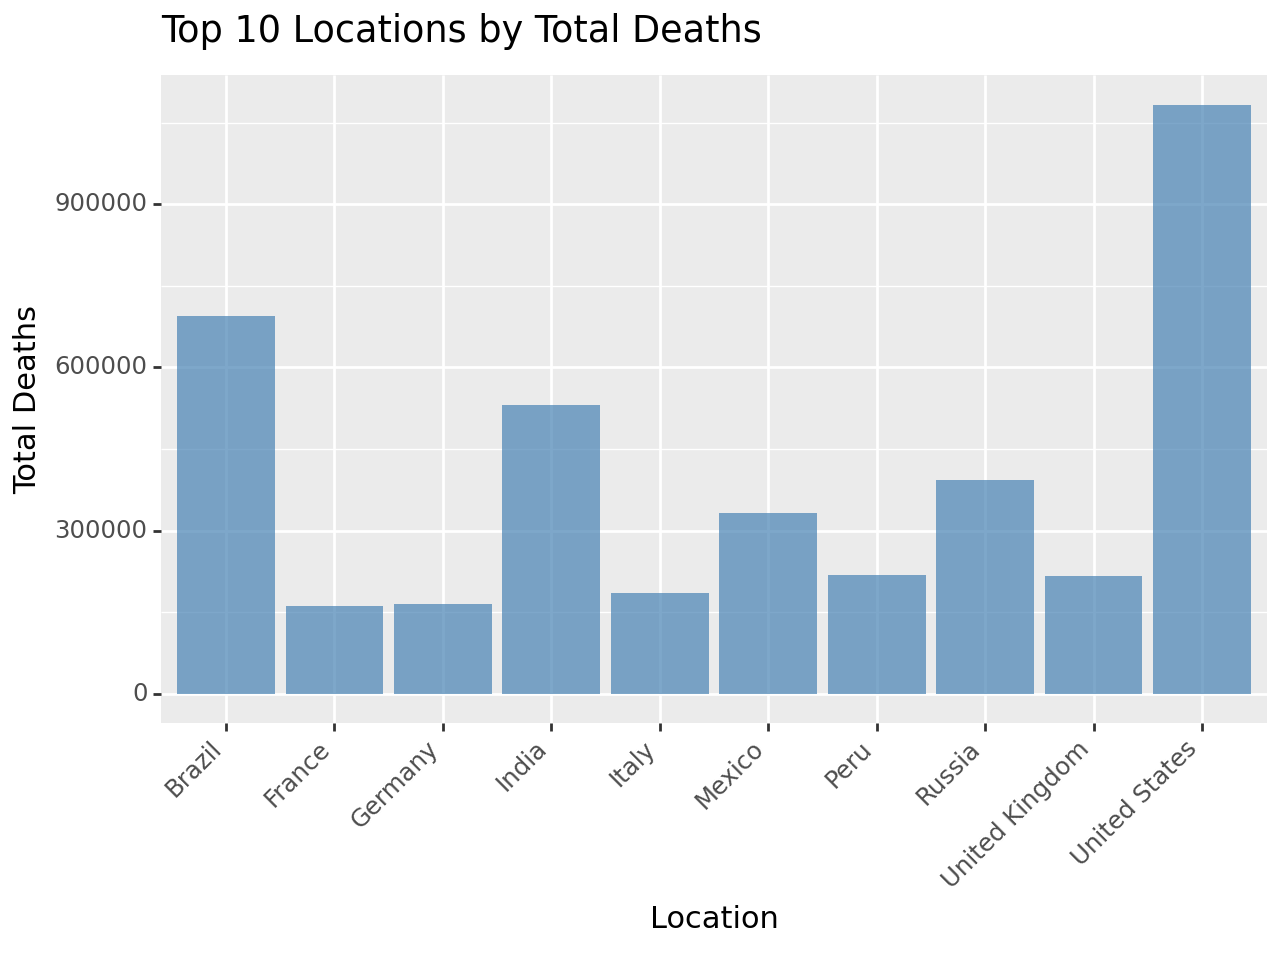

In [55]:

# Create ggplot
p = (ggplot(top_10_locations, aes(x='location', y='total_deaths'))
     + geom_bar(fill='steelblue', stat='identity', alpha=0.7)
     + labs(x='Location', y='Total Deaths', title='Top 10 Locations by Total Deaths')
     + theme(axis_text_x=element_text(rotation=45, ha='right')))

# Show the plot
print(p)

In [59]:
data_2022

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,month,day,ratio_total_cases,ratio_total_deaths
729,AFG,Asia,Afghanistan,2022-01-01,41128772,158059.0,0.0,7356.0,0.0,1,1,0.003843,0.000179
730,AFG,Asia,Afghanistan,2022-01-02,41128772,158112.0,53.0,7356.0,0.0,1,2,0.003844,0.000179
731,AFG,Asia,Afghanistan,2022-01-03,41128772,158156.0,44.0,7361.0,5.0,1,3,0.003845,0.000179
732,AFG,Asia,Afghanistan,2022-01-04,41128772,158171.0,15.0,7364.0,3.0,1,4,0.003846,0.000179
733,AFG,Asia,Afghanistan,2022-01-05,41128772,158207.0,36.0,7366.0,2.0,1,5,0.003847,0.000179
...,...,...,...,...,...,...,...,...,...,...,...,...,...
332297,ZWE,Africa,Zimbabwe,2022-12-27,16320539,259969.0,22.0,5635.0,0.0,12,27,0.015929,0.000345
332298,ZWE,Africa,Zimbabwe,2022-12-28,16320539,259982.0,13.0,5635.0,0.0,12,28,0.015930,0.000345
332299,ZWE,Africa,Zimbabwe,2022-12-29,16320539,260015.0,33.0,5635.0,0.0,12,29,0.015932,0.000345
332300,ZWE,Africa,Zimbabwe,2022-12-30,16320539,260059.0,44.0,5636.0,1.0,12,30,0.015934,0.000345


## total_cases vs months

In [68]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = data_2022[~data_2022['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('months')['total_cases'].max().reset_index().sort_values(by=['total_cases'],ascending=False)
grouped_df

,months,total_cases
2,December,99411696.0
9,November,97300648.0
10,October,96175292.0
11,September,94970674.0
1,August,93112303.0
5,July,90232883.0
6,June,86309948.0
8,May,83243387.0
0,April,80545387.0
7,March,79381947.0


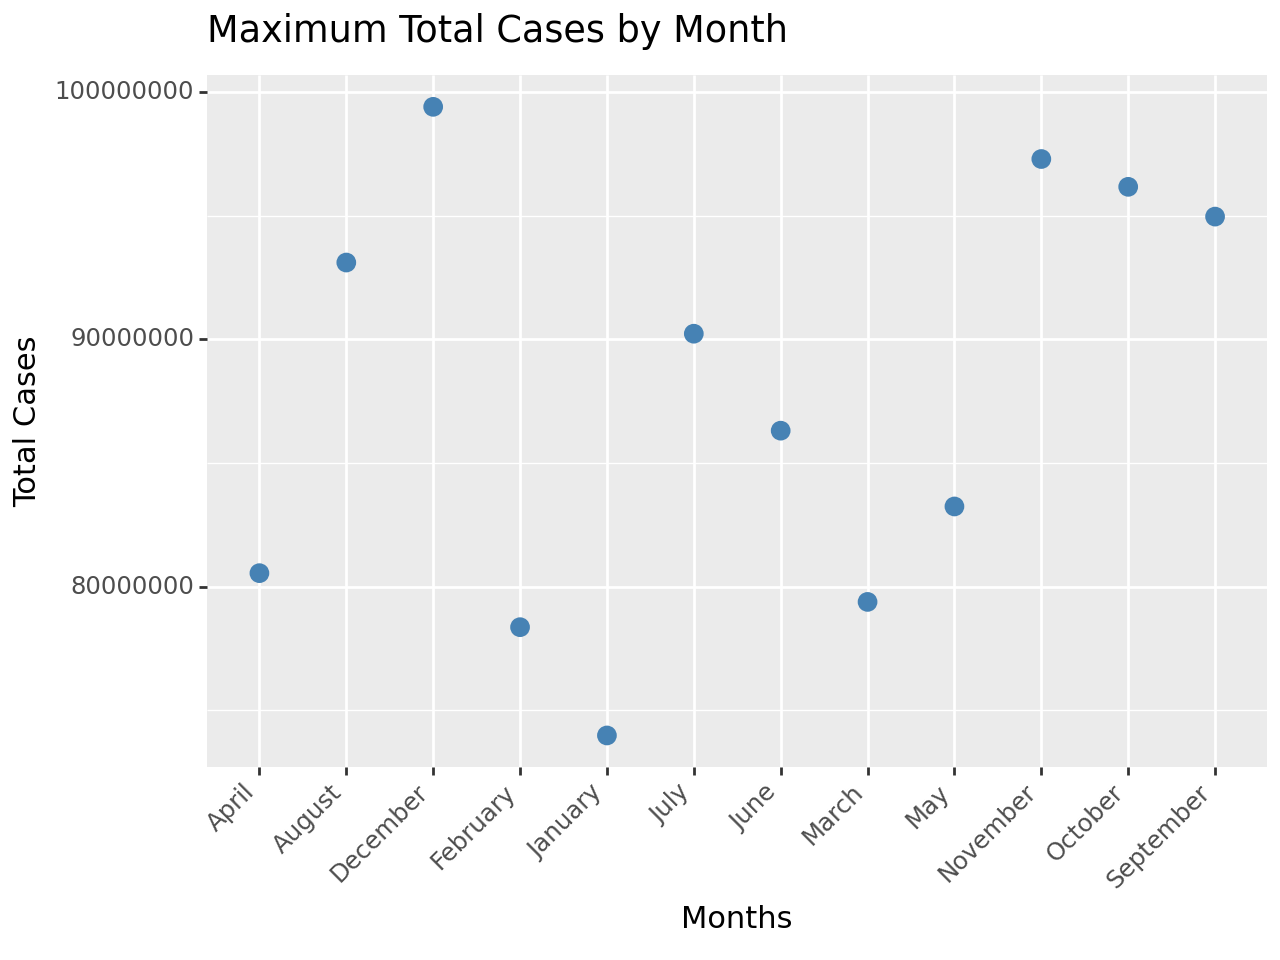

In [74]:
from plotnine import ggplot, aes, geom_point, theme, labs, element_text
import pandas as pd

p = (ggplot(grouped_df, aes(x='months', y='total_cases'))
     + geom_point(color='steelblue', size=3)
     + labs(x='Months', y='Total Cases', title='Maximum Total Cases by Month')
     + theme(axis_text_x=element_text(rotation=45, ha='right')))

# Show the plot
print(p)

# ANALYSING DATA AS A WHOLE 

## data cleaning

### adding year column through splitting date column

In [14]:
df['years']=df['date'].dt.year
df

,iso_code,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,months,years
0,AFG,Asia,Afghanistan,2020-01-03,41128772,NaN,0.0,NaN,0.0,January,2020
1,AFG,Asia,Afghanistan,2020-01-04,41128772,NaN,0.0,NaN,0.0,January,2020
2,AFG,Asia,Afghanistan,2020-01-05,41128772,NaN,0.0,NaN,0.0,January,2020
3,AFG,Asia,Afghanistan,2020-01-06,41128772,NaN,0.0,NaN,0.0,January,2020
4,AFG,Asia,Afghanistan,2020-01-07,41128772,NaN,0.0,NaN,0.0,January,2020
...,...,...,...,...,...,...,...,...,...,...,...
332518,ZWE,Africa,Zimbabwe,2023-08-05,16320539,265693.0,0.0,5712.0,0.0,August,2023
332519,ZWE,Africa,Zimbabwe,2023-08-06,16320539,265693.0,0.0,5712.0,0.0,August,2023
332520,ZWE,Africa,Zimbabwe,2023-08-07,16320539,265693.0,0.0,5712.0,0.0,August,2023
332521,ZWE,Africa,Zimbabwe,2023-08-08,16320539,265693.0,0.0,5712.0,0.0,August,2023


## which year has the most cases of covid19 from 2020-2023

In [15]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = df[~df['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('years')['total_cases'].max().reset_index().sort_values(by=['total_cases'],ascending=False)
grouped_df

,years,total_cases
3,2023,103436829.0
2,2022,99411696.0
1,2021,53534286.0
0,2020,19577585.0


2023 has the most cases because it contains data from 2020 to 2023 

EDA

In [20]:
import plotly.express as px

In [47]:
px.histogram(grouped_df,x='years',y='total_cases',width=800,color='years')

In [48]:
##  which year has the most deaths of covid19 from 2020-2023

In [49]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = df[~df['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('years')['total_deaths'].max().reset_index().sort_values(by=['total_deaths'],ascending=False)
grouped_df

,years,total_deaths
3,2023,1127152.0
2,2022,1082456.0
1,2021,819055.0
0,2020,352004.0


In [54]:
px.area(grouped_df,x='years',y='total_deaths',width=800)

In [61]:
exclude_values = ['Lower middle income','Low income','European Union','World','Asia','Africa','High income','Europe','North America','South America','Upper middle income','Oceania']
filtered_df = df[~df['location'].isin(exclude_values)]

grouped_df = filtered_df.groupby('location')['total_deaths'].max().reset_index().sort_values(by=['total_deaths'],ascending=False)
grouped_df

,location,total_deaths
229,United States,1127152.0
28,Brazil,704659.0
96,India,531918.0
177,Russia,399897.0
135,Mexico,334336.0
...,...,...
217,Tokelau,NaN
222,Turkmenistan,NaN
234,Vatican,NaN
237,Wales,NaN


In [65]:
px.histogram(grouped_df,x='location',y='total_deaths',color='location')